In [1]:
import numpy as np
from scipy.optimize import minimize
from torch.autograd.functional import jacobian
import torch
import matplotlib.pyplot as plt

In [2]:
with np.load("data_89.npz") as data:
    X = data['A2']
    y = data['y2']

# Задание 1

In [3]:
def f_torch(x, a):
    return 1./(torch.exp(a[0] + torch.inner(a[1:], x)) + 1)

def f(x, a):
    return 1./(np.exp(a[0] + np.inner(a[1:], x)) + 1)


def target(a, X, y):
    return sum((f(x, a) - yy)**2 for x, yy in zip(X, y))
def target_torch(a, X, y):
    return sum((f_torch(x, a) - yy)**2 for x, yy in zip(X, y))

In [4]:
m = X[0].shape[0]
a0 = [0]*(m + 1)
res = minimize(target, a0, args=(X, y))

In [5]:
a_min = res.x

In [6]:
a_min

array([ 0.58423828,  0.32177812, -0.11362938,  1.99874006, -0.31966349,
       -0.28386703, -0.35973175, -0.0217515 ,  0.00976823,  1.53323475,
       -0.59548243])

# Задание 2

In [8]:
def GD_autograd(X, y, npts=10000, step=1e-5, eps=1e-6):
    m = X[0].shape[0]
    a = torch.rand(m + 1)
    print(a)
    X = X.astype(np.float32)
    for i in range(npts):
        a1 = a - step* jacobian(target_torch, inputs=(a, torch.tensor(X), torch.tensor(y)))[0]
        if abs(a1 - a).all() < eps:
            break
        a = a1
    return a1

In [9]:
print(GD_autograd(X, y))

tensor([0.9792, 0.4254, 0.0776, 0.9157, 0.9478, 0.3593, 0.1406, 0.9882, 0.9430,
        0.0171, 0.5900])
tensor([1.0169, 0.4433, 0.0516, 0.8752, 0.9213, 0.3171, 0.0174, 0.9173, 0.9614,
        0.1875, 0.5199])


In [10]:
def grad(a, X, y):
    h = 1e-6
    g = []
    for i, param in enumerate(a):
        t = target(a, X, y)
        a[i] += h
        g.append((target(a, X, y) - t)/h)
    return g

In [11]:
def GD(X, y, npts=10000, step=1e-5, eps=1e-6):
    m = X[0].shape[0]
    a = np.random.rand(m + 1)
    print(a)
    for i in range(npts):
        a1 = a - step *np.array(grad(a, X, y))
        if abs(a1 - a).all() < eps:
            break
        a = a1
    return a1

In [12]:
GD(X, y)

[0.69984661 0.1205036  0.39892956 0.84659609 0.88388384 0.6507503
 0.33302566 0.64312943 0.69496838 0.69823158 0.18087336]


array([0.71496766, 0.16287081, 0.37666858, 0.82791116, 0.85964049,
       0.64346751, 0.22835669, 0.59526213, 0.72773526, 0.8468474 ,
       0.13312669])

# Задание 3

Power_divergenceResult(statistic=663.0884556659522, pvalue=2.3414916812464746e-39)
Power_divergenceResult(statistic=3138.01635860839, pvalue=5.434242814713836e-219)
Power_divergenceResult(statistic=10857.267557686551, pvalue=0.0)
Power_divergenceResult(statistic=63311.27661072029, pvalue=0.0)


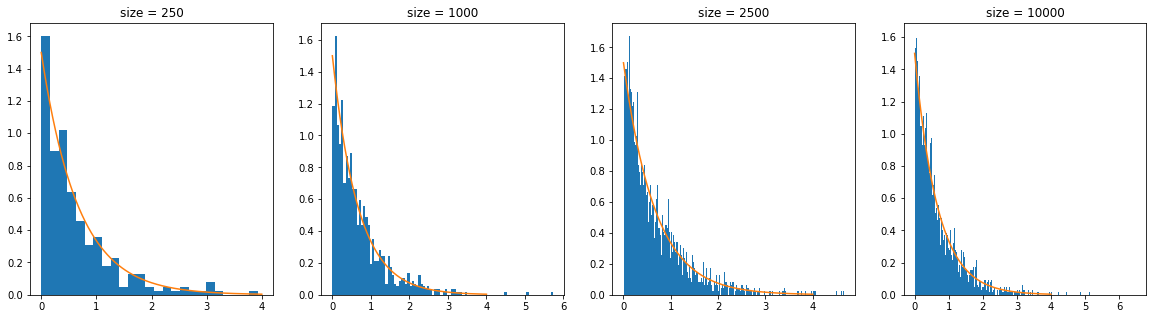

In [13]:
#3
from scipy.stats import chisquare
lam = 1.5
exp_5 = lambda y: -np.log(y) / lam


fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, size in enumerate([250, 1000, 2500, 10000]):
    uniform = np.random.random(size)
    sample = exp_5(uniform)
    ax[i].hist(sample, bins = size // 10, density = True)
    x = np.linspace(0, 4, 1000)
    ax[i].plot(x, lam*np.exp(-lam*x))
    ax[i].set_title("size = %i" % size)
    print(chisquare(sample, np.random.exponential(scale=lam, size=size)))
plt.show()

# Задание 4

Power_divergenceResult(statistic=80.46441115818294, pvalue=1.0)
Power_divergenceResult(statistic=1722.7090684086807, pvalue=2.7683921318784854e-41)
Power_divergenceResult(statistic=-10883.238079665634, pvalue=1.0)
Power_divergenceResult(statistic=-6477.784909246526, pvalue=1.0)


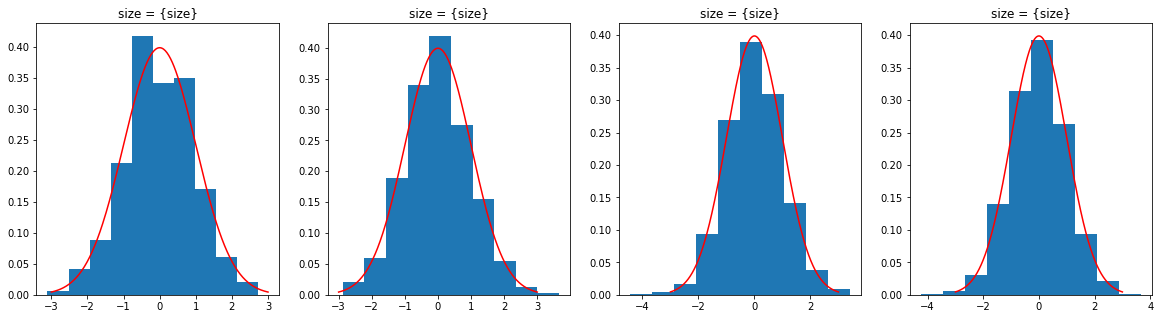

In [14]:
#4
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, size in enumerate([250, 1000, 2500, 10000]):
    uniform = np.random.uniform(size=size)
    
    norm = np.sqrt(-2*np.log(uniform))
    
    phi = np.random.uniform(size=size) * 2*np.pi
    
    sample = np.array(norm * np.cos(phi))
    
    ax[i].hist(sample, density=True)
    x = np.linspace(-3, 3,size)
    
    ax[i].plot(x, 1./np.sqrt(2*np.pi)*np.exp(-(x)**2/2), color='red')
    
    ax[i].set_title('size = {size}')
    
    print(chisquare(sample, np.random.normal(size=size)))

# Задание 5

In [15]:
#5
with np.load("data_89.npz") as data:
    A = data["A4"]

In [16]:
def MC_integral(A, npts):
    f = lambda x: 1/np.linalg.norm(x)
    
    eigvals, eigvec = np.linalg.eigh(A)
    n = eigvals.shape[0]
    
    sigma = 1.
    I = 0.
    
    v = np.zeros((npts, n))
    for i, lam in enumerate(eigvals):
        s = np.sqrt(1 / (2 * lam))
        v[:, i] = np.random.normal(0, s, size=npts)
        sigma *= s

    mean = np.mean([f(v[i]) for i in range(npts)])
    
    I = (2*np.pi)**(n/2) * sigma * mean
    return I

In [17]:
MC_integral(A, 10**6)

0.9660823004371317

# Задание 6

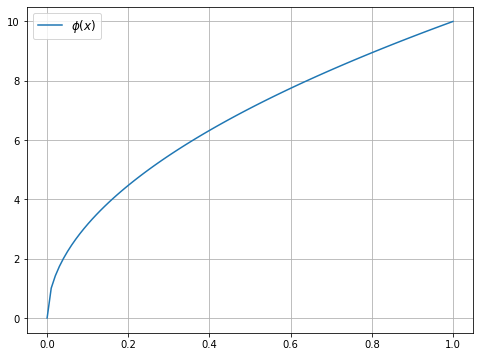

In [18]:
#6
from scipy.special import roots_sh_legendre
n, w = roots_sh_legendre(4)
sqr = lambda x: 5*np.sqrt(x)
under = lambda x,t: np.sqrt(x*t)

A = np.empty((4,4))

for i in range(A.shape[0]):
    for j in range(A.shape[0]):
        A[i][j] = - w[j]*under(n[i], n[j])
        
A += np.eye(A.shape[0])

b = sqr(n)
pn = np.linalg.solve(A, b)
x_val = np.linspace(0, 1, 100)

phi = np.array([np.sum([w[i]*pn[i]*under(n[i],x) for i in range(4)]) + sqr(x) for x in x_val])

plt.figure(figsize=(8,6))
plt.plot(x_val, phi, label='$\phi(x)$')
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()